# Tourism Favour Over Tourist Spots Indonesia Recommendation

There are 2 types of 'rating' input :
* Explicit Feedback = Input from users explicitly (rating given from users)
* Implicit Feedback = Input from users implicitly (rating by like, comments, subscribe, etc)

Recommendation method has 3 types of technique :
* Content-based Filtering
* Collaborative Filtering

## Importing Library

In [1]:
pip install matplotlib --upgrade scikit-surprise

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load Dataset

This dataset is a dataset that contains several tourist attractions in 5 major cities in Indonesia, namely Jakarta, Yogyakarta, Semarang, Bandung, Surabaya. This dataset is used in the Capstone Project Bangkit Academy 2021 called GetLoc. GetLoc as an application that is able to recommend several tourist destinations according to the user, what the user likes, and several parameters such as city, price, category, and also time. In addition, GetLoc is also able to provide the fastest and cheapest routes in visiting these places, so that your travel experience will be more interesting. You can see the repository here

This dataset also consists of 4 files, namely:

* **tourism_ with _id.csv** which contains information on tourist attractions in 5 major cities in Indonesia totaling ~400
* **user.csv** which contains dummy user data to make recommendation features based on user
* **tourism_rating.csv** contains 3 columns, namely the user, the place, and the rating given, serves to create a recommendation system based on the rating

Data source :
https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

In [10]:
tourism_rate = pd.read_csv('/content/drive/MyDrive/project/data_science/final_project/tourism_rating.csv')
tourism_rate.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [11]:
tourism_rate.shape

(10000, 3)

In [12]:
tourism_w_id = pd.read_csv('/content/drive/MyDrive/project/data_science/final_project/tourism_with_id.csv')
tourism_w_id.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [13]:
tourism_w_id.shape

(437, 13)

In [14]:
tourist = pd.read_csv('/content/drive/MyDrive/project/data_science/final_project/user.csv')
tourist.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


In [15]:
tourist.shape

(300, 3)

Combine `tourist` , `tourism_rate` and `tourism_w_id`

In [16]:
data = tourism_rate.merge(tourist, on=["User_Id"])
data.head()

,User_Id,Place_Id,Place_Ratings,Location,Age
0,1,179,3,"Semarang, Jawa Tengah",20
1,1,344,2,"Semarang, Jawa Tengah",20
2,1,5,5,"Semarang, Jawa Tengah",20
3,1,373,3,"Semarang, Jawa Tengah",20
4,1,101,4,"Semarang, Jawa Tengah",20


In [17]:
data = data.merge(tourism_w_id, on=["Place_Id"])
data.head()

,User_Id,Place_Id,Place_Ratings,Location,Age,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
1,22,179,4,"Subang, Jawa Barat",25,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
2,40,179,3,"Semarang, Jawa Tengah",27,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
3,49,179,5,"Jakarta Pusat, DKI Jakarta",24,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179
4,74,179,3,"Semarang, Jawa Tengah",30,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0,"{'lat': -7.7705416, 'lng': 110.4894158}",-7.770542,110.489416,NaN,179


We don't need `Coordinate` , `Lat`, `Long`, and other last 2 columns, we'll remove them.

In [18]:
data.drop(data.columns[[-5, -4, -3, -2, -1]], axis=1, inplace=True)
data.head()

,User_Id,Place_Id,Place_Ratings,Location,Age,Place_Name,Description,Category,City,Price,Rating,Time_Minutes
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0
1,22,179,4,"Subang, Jawa Barat",25,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0
2,40,179,3,"Semarang, Jawa Tengah",27,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0
3,49,179,5,"Jakarta Pusat, DKI Jakarta",24,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0
4,74,179,3,"Semarang, Jawa Tengah",30,Candi Ratu Boko,Situs Ratu Baka atau Candi Boko (Hanacaraka:ꦕꦤ...,Budaya,Yogyakarta,75000,4.6,90.0


### Statistics

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   User_Id        10000 non-null  int64  
 1   Place_Id       10000 non-null  int64  
 2   Place_Ratings  10000 non-null  int64  
 3   Location       10000 non-null  object 
 4   Age            10000 non-null  int64  
 5   Place_Name     10000 non-null  object 
 6   Description    10000 non-null  object 
 7   Category       10000 non-null  object 
 8   City           10000 non-null  object 
 9   Price          10000 non-null  int64  
 10  Rating         10000 non-null  float64
 11  Time_Minutes   4628 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1015.6+ KB


In [20]:
data.describe()

,User_Id,Place_Id,Place_Ratings,Age,Price,Rating,Time_Minutes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,4628.000000
mean,151.292700,219.416400,3.066500,28.726200,23725.500000,4.445700,83.291919
std,86.137374,126.228335,1.379952,6.355004,62633.550481,0.207345,51.954188
min,1.000000,1.000000,1.000000,18.000000,0.000000,3.400000,10.000000
25%,77.000000,108.750000,2.000000,24.000000,0.000000,4.400000,45.000000
50%,151.000000,220.000000,3.000000,29.000000,5000.000000,4.500000,60.000000
75%,226.000000,329.000000,4.000000,34.000000,20000.000000,4.600000,120.000000
max,300.000000,437.000000,5.000000,40.000000,900000.000000,5.000000,360.000000


In [21]:
# group column names based on type
# it will make our life easier onwards
categoricals = ['Location','Place_Name','Description',
                'Category','City']

numericals = ['Place_Ratings','Age','Price','Rating','Time_Minutes']

In [22]:
# numerical statistical summary
data[numericals].describe()

,Place_Ratings,Age,Price,Rating,Time_Minutes
count,10000.000000,10000.000000,10000.000000,10000.000000,4628.000000
mean,3.066500,28.726200,23725.500000,4.445700,83.291919
std,1.379952,6.355004,62633.550481,0.207345,51.954188
min,1.000000,18.000000,0.000000,3.400000,10.000000
25%,2.000000,24.000000,0.000000,4.400000,45.000000
50%,3.000000,29.000000,5000.000000,4.500000,60.000000
75%,4.000000,34.000000,20000.000000,4.600000,120.000000
max,5.000000,40.000000,900000.000000,5.000000,360.000000


In [23]:
# describe method on categorical data
data[categoricals].describe()

,Location,Place_Name,Description,Category,City
count,10000,10000,10000,10000,10000
unique,28,437,437,6,5
top,"Bekasi, Jawa Barat",Pantai Parangtritis,Pantai Parangtritis (bahasa Jawa: ꦥꦱꦶꦱꦶꦂ ꦥꦫꦁꦠꦿ...,Taman Hiburan,Yogyakarta
freq,1255,39,39,3053,2871


There are a lot unique values of `place_name` and `description`. We'll remove both of them later because places are already been encoded with their id. We have to encode the others.

In [24]:
# showing the precise value counts
# this code is especially useful if we have many categorical columns
for col in categoricals:
  print(f"Value counts of {col} column")
  print(data[col].value_counts(), '\n')

Value counts of Location column
Bekasi, Jawa Barat              1255
Semarang, Jawa Tengah            771
Yogyakarta, DIY                  701
Lampung, Sumatera Selatan        667
Bogor, Jawa Barat                583
Cirebon, Jawa Barat              479
Subang, Jawa Barat               467
Jakarta Selatan, DKI Jakarta     447
Depok, Jawa Barat                422
Ponorogo, Jawa Timur             382
Jakarta Pusat, DKI Jakarta       344
Serang, Banten                   325
Jakarta Utara, DKI Jakarta       314
Surabaya, Jawa Timur             305
Sragen, Jawa Tengah              297
Karawang, Jawa Barat             273
Tanggerang, Banten               258
Kota Gede, DIY                   246
Bandung, Jawa Barat              241
Jakarta Barat, DKI Jakarta       204
Jakarta Timur, DKI Jakarta       202
Palembang, Sumatera Selatan      181
Klaten, Jawa Tengah              132
Solo, Jawa Tengah                129
Purwakarat, Jawa Barat           125
Cilacap, Jawa Tengah             115
Nganju

### Understanding the Data

1. **user_id** = custom id designated for each user
2. **place_id** = custom id designated for each place
3. **place_ratings** = rate given by user for each place, individually
4. **location** = user's location at the time
5. **age** = user's age
6. **place_name** = the destination name , either it's location or building, specifically
7. **description** = the description of the place
8. **category** = the place's category
9. **city** = the region/city where the destination resides
10. **price** = the fare/price for entering the place
11. **rating** = the AVERAGE RATE given from the whole respondents/users
12. **time_minutes** = time spent for each place (in minutes)

I will try to analyze the popularity of each destination. Therefore, I will remove `description`. I'll also rename the some columns =
* place_ratings -> dest_rating
* location -> user_loc
* age -> user_age
* city -> dest_city
* time_minutes -> minutes_spent

And lastly, I'll change all the column's caps to be in lower caps

In [25]:
data.drop(['Description'],axis=1,inplace = True)

In [26]:
data.rename(columns={"Place_Ratings": "dest_rating","Location": "user_loc","Age": "user_age",
                     "City": "dest_city","Time_Minutes": "minutes_spent",
                     }, inplace=True)

In [27]:
data.columns = [x.lower() for x in data.columns]

In [28]:
data.head()

,user_id,place_id,dest_rating,user_loc,user_age,place_name,category,dest_city,price,rating,minutes_spent
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0
1,22,179,4,"Subang, Jawa Barat",25,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0
2,40,179,3,"Semarang, Jawa Tengah",27,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0
3,49,179,5,"Jakarta Pusat, DKI Jakarta",24,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0
4,74,179,3,"Semarang, Jawa Tengah",30,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0


####Create new Features

In [29]:
data[['user_loc_city', 'user_loc_prov']] = data['user_loc'].str.split(',', 1, expand=True)

In [30]:
data.head()

,user_id,place_id,dest_rating,user_loc,user_age,place_name,category,dest_city,price,rating,minutes_spent,user_loc_city,user_loc_prov
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0,Semarang,Jawa Tengah
1,22,179,4,"Subang, Jawa Barat",25,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0,Subang,Jawa Barat
2,40,179,3,"Semarang, Jawa Tengah",27,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0,Semarang,Jawa Tengah
3,49,179,5,"Jakarta Pusat, DKI Jakarta",24,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0,Jakarta Pusat,DKI Jakarta
4,74,179,3,"Semarang, Jawa Tengah",30,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,90.0,Semarang,Jawa Tengah


In [31]:
# strip whitespace user_loc_prov
data['user_loc_prov'] = data['user_loc_prov'].str.strip()

#### Check Null Values

In [32]:
data.isna().sum()* 100 / len(data)

user_id           0.00
place_id          0.00
dest_rating       0.00
user_loc          0.00
user_age          0.00
place_name        0.00
category          0.00
dest_city         0.00
price             0.00
rating            0.00
minutes_spent    53.72
user_loc_city     0.00
user_loc_prov     0.00
dtype: float64

We can see that `minutes_spent` has dense NULL VALUES , exceeding 50% of data. `minutes_spent` column contains how long (in minutes) does user spent but because there are so many NULL values, instead remove NULL rows, we'll remove the `minute_spent` column.

In [33]:
data.drop(['minutes_spent'],axis=1,inplace = True)

In [34]:
data.isna().sum()* 100 / len(data)

user_id          0.0
place_id         0.0
dest_rating      0.0
user_loc         0.0
user_age         0.0
place_name       0.0
category         0.0
dest_city        0.0
price            0.0
rating           0.0
user_loc_city    0.0
user_loc_prov    0.0
dtype: float64

There are no null values in the dataset.

#### Check Duplicated Values

In [35]:
data.duplicated().sum()

79

There are 79 rows with duplicated values. Let's see what they are.

In [36]:
data.loc[data.duplicated(), :]

,user_id,place_id,dest_rating,user_loc,user_age,place_name,category,dest_city,price,rating,user_loc_city,user_loc_prov
92,87,373,3,"Jakarta Pusat, DKI Jakarta",30,Museum Kereta Ambarawa,Budaya,Semarang,10000,4.5,Jakarta Pusat,DKI Jakarta
545,26,15,2,"Palembang, Sumatera Selatan",38,Pasar Seni,Pusat Perbelanjaan,Jakarta,0,4.4,Palembang,Sumatera Selatan
651,1,328,2,"Semarang, Jawa Tengah",20,Gua Pawon,Cagar Alam,Bandung,10000,4.5,Semarang,Jawa Tengah
672,273,328,4,"Jakarta Barat, DKI Jakarta",33,Gua Pawon,Cagar Alam,Bandung,10000,4.5,Jakarta Barat,DKI Jakarta
691,133,307,4,"Surabaya, Jawa Timur",29,Perkebunan Teh Malabar,Cagar Alam,Bandung,5000,4.4,Surabaya,Jawa Timur
...,...,...,...,...,...,...,...,...,...,...,...,...
9535,184,87,4,"Serang, Banten",30,Sindu Kusuma Edupark (SKE),Taman Hiburan,Yogyakarta,20000,4.2,Serang,Banten
9739,235,232,5,"Serang, Banten",18,Bukit Moko,Cagar Alam,Bandung,25000,4.5,Serang,Banten
9743,263,232,5,"Depok, Jawa Barat",27,Bukit Moko,Cagar Alam,Bandung,25000,4.5,Depok,Jawa Barat
9938,157,350,3,"Yogyakarta, DIY",28,Pantai Cipta,Bahari,Semarang,5000,4.0,Yogyakarta,DIY


Same user may have visited the same places and give exact rate for each respective location. We'll remove those rows to avoid bias but keep the LAST value of duplicated rows.

In [37]:
# Use keep='last' to keep the last occurrence 
data.drop_duplicates(keep='last',inplace=True)
data.head()

,user_id,place_id,dest_rating,user_loc,user_age,place_name,category,dest_city,price,rating,user_loc_city,user_loc_prov
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Semarang,Jawa Tengah
1,22,179,4,"Subang, Jawa Barat",25,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Subang,Jawa Barat
2,40,179,3,"Semarang, Jawa Tengah",27,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Semarang,Jawa Tengah
3,49,179,5,"Jakarta Pusat, DKI Jakarta",24,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Jakarta Pusat,DKI Jakarta
4,74,179,3,"Semarang, Jawa Tengah",30,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Semarang,Jawa Tengah


In [38]:
data.duplicated().sum()

0

No duplicated rows. We can proceed to exploratory data analysis without any extra steps. Let's see final data.

#### Clean Data before Encoding

In [39]:
data

,user_id,place_id,dest_rating,user_loc,user_age,place_name,category,dest_city,price,rating,user_loc_city,user_loc_prov
0,1,179,3,"Semarang, Jawa Tengah",20,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Semarang,Jawa Tengah
1,22,179,4,"Subang, Jawa Barat",25,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Subang,Jawa Barat
2,40,179,3,"Semarang, Jawa Tengah",27,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Semarang,Jawa Tengah
3,49,179,5,"Jakarta Pusat, DKI Jakarta",24,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Jakarta Pusat,DKI Jakarta
4,74,179,3,"Semarang, Jawa Tengah",30,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Semarang,Jawa Tengah
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,240,140,3,"Cirebon, Jawa Barat",22,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,Cirebon,Jawa Barat
9996,247,140,4,"Bekasi, Jawa Barat",28,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,Bekasi,Jawa Barat
9997,261,140,4,"Yogyakarta, DIY",38,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,Yogyakarta,DIY
9998,267,140,3,"Semarang, Jawa Tengah",31,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,Semarang,Jawa Tengah


Let's drop `user_loc` because we already split the values into `user_loc_city` and `user_loc_prov`

In [40]:
data.drop(columns='user_loc',inplace=True)

In [41]:
data

,user_id,place_id,dest_rating,user_age,place_name,category,dest_city,price,rating,user_loc_city,user_loc_prov
0,1,179,3,20,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Semarang,Jawa Tengah
1,22,179,4,25,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Subang,Jawa Barat
2,40,179,3,27,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Semarang,Jawa Tengah
3,49,179,5,24,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Jakarta Pusat,DKI Jakarta
4,74,179,3,30,Candi Ratu Boko,Budaya,Yogyakarta,75000,4.6,Semarang,Jawa Tengah
...,...,...,...,...,...,...,...,...,...,...,...
9995,240,140,3,22,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,Cirebon,Jawa Barat
9996,247,140,4,28,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,Bekasi,Jawa Barat
9997,261,140,4,38,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,Yogyakarta,DIY
9998,267,140,3,31,Bendung Lepen,Taman Hiburan,Yogyakarta,0,4.6,Semarang,Jawa Tengah


###EDA

In [42]:
## Helper Functions

## MULTI-PLOT

def univariate_multi_plot(df=None, x=None, xlabel=None, explode=None):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.countplot(data=df, x=x, ax=ax[0], order=df[x].value_counts(ascending=True).index)
    df[x].value_counts(ascending=True).plot(kind="pie", autopct="%1.1f%%", ax=ax[1], explode=explode)
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    ax[0].bar_label(ax[0].containers[0], label_type='edge', size=12, padding=1, 
                    color="#7f7f7f")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, ha="center", va="center")
    plt.show()

In [43]:
## Helper Functions

## SINGLE PLOT

def univariate_single_plot(df=None, x=None, xlabel=None, rotation=None, bar_label=False):
    fig, ax = plt.subplots(1, 1, figsize=(20, 7))
    sns.countplot(data=df, x=x, order=df[x].value_counts(ascending=True).index)
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel=xlabel, size=14)
    plt.xticks(rotation=rotation)
    plt.ylabel(ylabel="")
    if bar_label:
        ax.bar_label(ax.containers[0], label_type='edge', size=10, padding=1,
                        color="#7f7f7f")
    plt.title(label=f'{xlabel} Distribution', size=18)
    plt.show()

In [44]:
## Helper Functions

## NUMERICAL DATA

def univariate_numerical_plot(df=None, x=None, xlabel=None, bar_label=True):
    fig, ax = plt.subplots(1, 2, figsize=(20, 7))
    sns.histplot(data=df, x=x, kde=True, ax=ax[0])
    sns.boxplot(data=df, x=x, ax=ax[1])
    sns.despine(bottom=True, left=True)
    ax[0].set_xlabel(xlabel=xlabel, size=12)
    ax[1].set_xlabel(xlabel=xlabel, size=12)
    ax[0].set_ylabel(ylabel="")
    ax[1].set_ylabel(ylabel="")
    fig.text(0.5, 1, f'{xlabel} Distribution', size=16, ha="center", va="center")
    plt.show()

In [45]:
## Helper Functions

## TOP CATEGORICAL DATA BASED ON CONDITION

def top_n_categorical(df=None, x=None, xlabel=None, y=None, ylabel=None, toplimit=None, xtitle=None, bar_label=True):
    #out_df = df.groupby(x).y.value_counts().unstack(0).plot.barh().sort_values(by=[y]).head(toplimit)

    # Construct a Dataset
    df.columns = df.columns.str.lower()
    out_df = df.groupby([x],as_index=False).size()
    out_df = df.sort_values(by=[y], ascending=False).head(toplimit)

    fig = plt.figure(figsize=(20, 7))
    ax = fig.add_subplot()

    sns.barplot(
        data=out_df,
        x=out_df[y],
        y=out_df[x],
        orient='h')
    sns.despine(bottom=True, left=True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.title(f'Top {xtitle}', fontsize = 16)
    plt.show()

####Top 10 Destinations by Place Rating

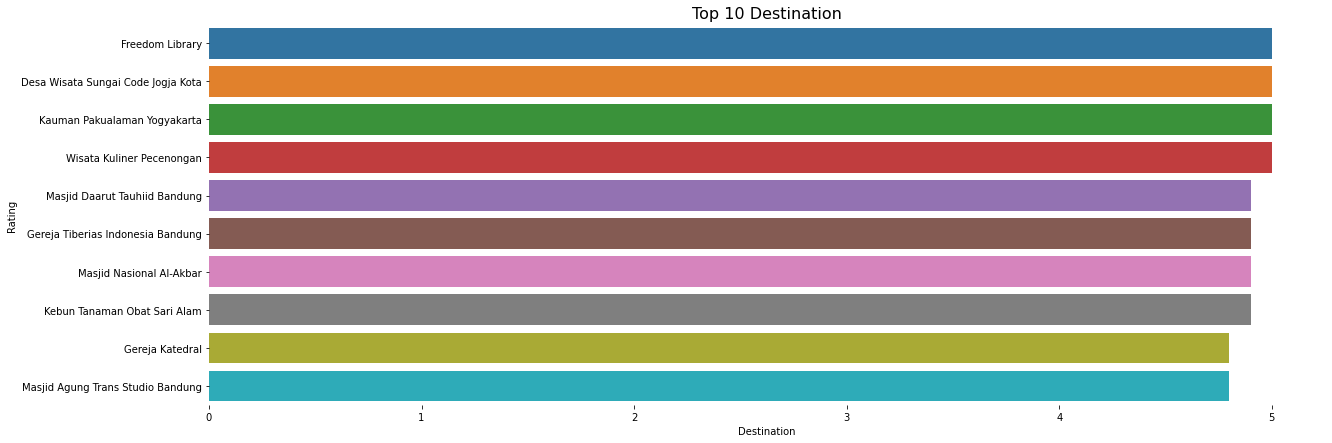

In [46]:
top_n_categorical(df=tourism_w_id,
                  x="place_name",
                  xlabel="Destination",
                  y="rating",
                  ylabel="Rating",
                  toplimit=10,
                  xtitle="10 Destination")

* We can observe that at least 4 of 10 have maximum rate which is 5/5
* The lowest rating in top 10 is around 4.8

####Destination Region/City Preferences Distribution

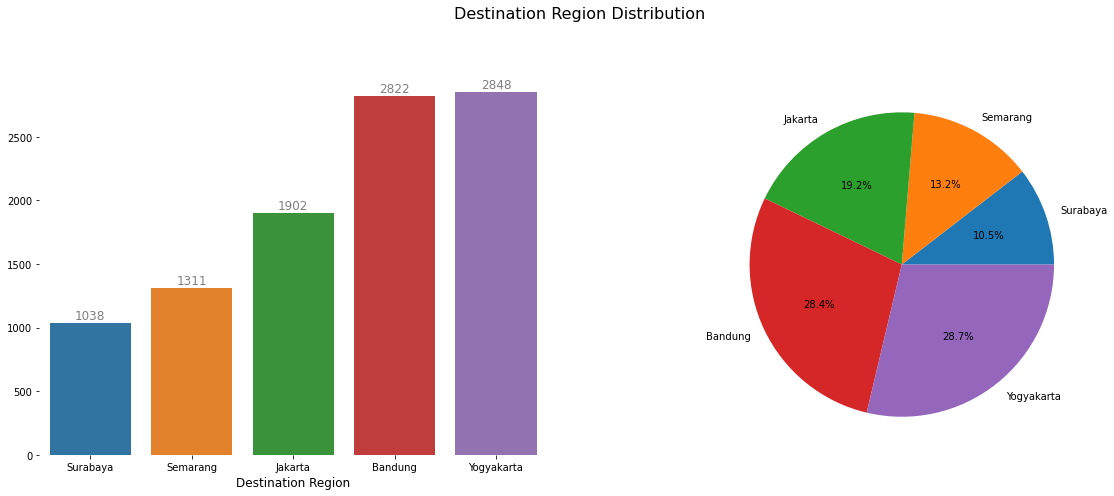

In [47]:
univariate_multi_plot(df=data, x="dest_city", xlabel="Destination Region")

* Yogyakarta holds the most visited region for users
* Despite of being The Capital City, Jakarta is relatively the middle choice by users

####Destination Category Preferences Distribution

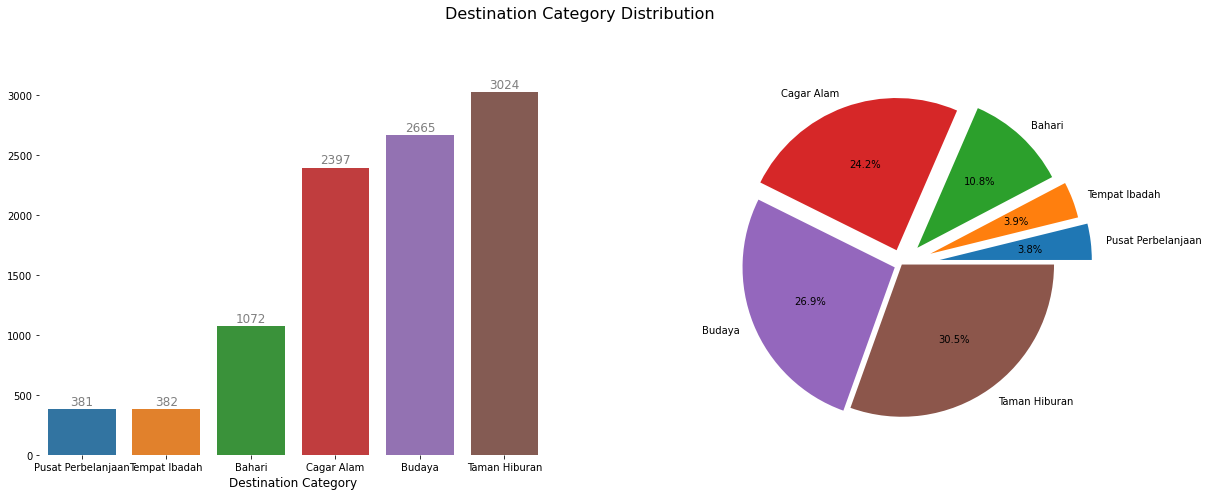

In [48]:
univariate_multi_plot(df=data, x="category", xlabel="Destination Category", explode=(0.25, 0.2, 0.15, 0.1, 0.05, 0))

* Taman Hiburan, Budaya, and Cagar Alam category are the top 3 preferred as destination category
* The differences between Tempat Ibadah and Pusat Perbelanjaan is not that much

#### Users' Age Distribution

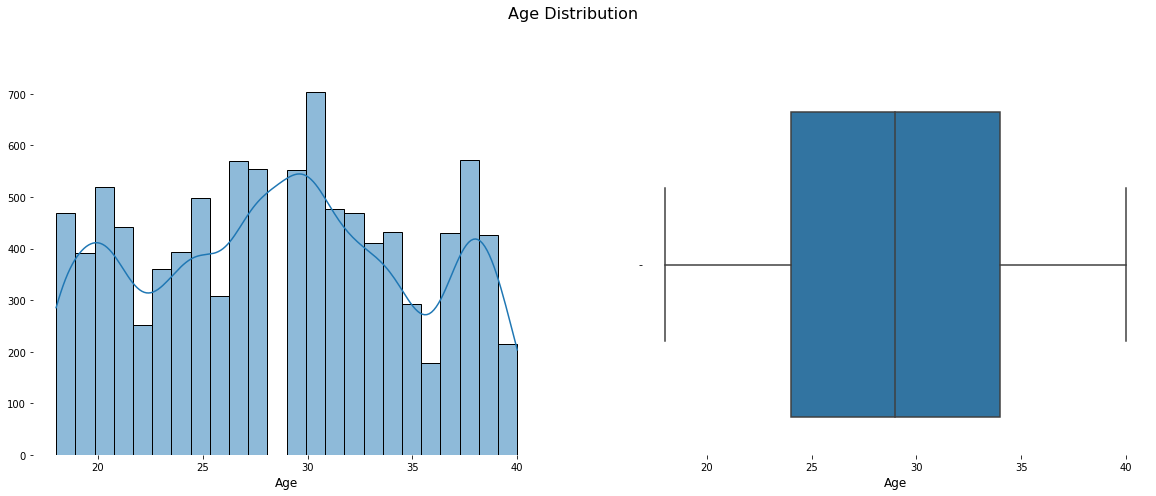

In [49]:
univariate_numerical_plot(df=data, x="user_age", xlabel="Age")

* While the age varies, but most users is around 25-30 years old

####Users' Location Distribution

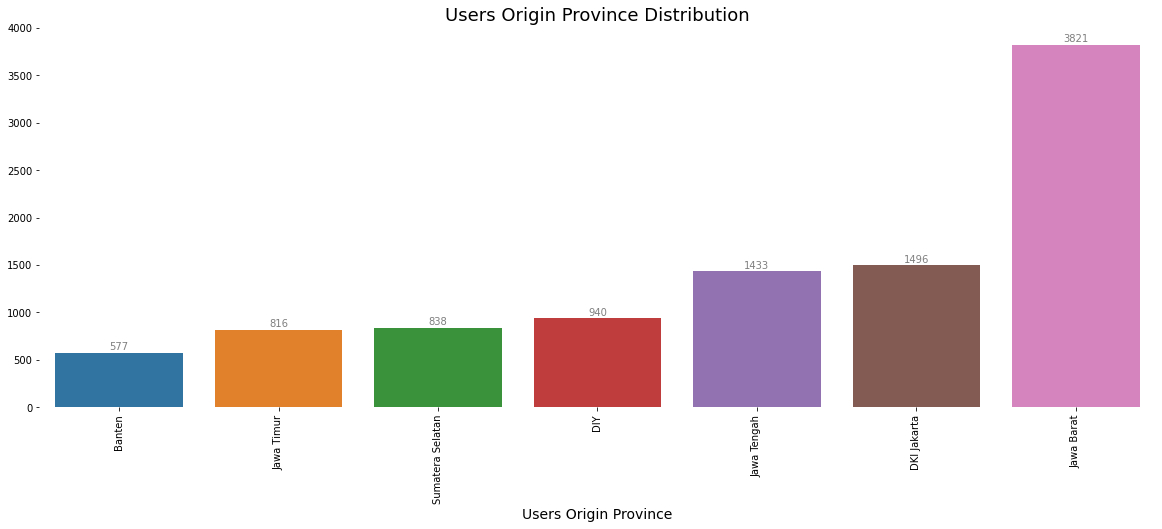

In [50]:
univariate_single_plot(df=data, x="user_loc_prov", xlabel="Users Origin Province", rotation=90, bar_label=True)

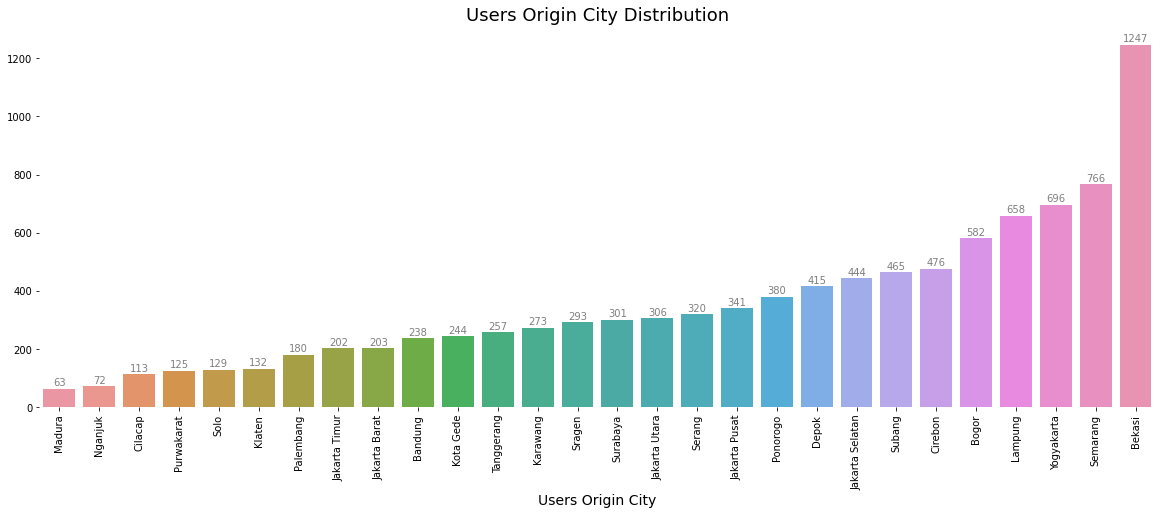

In [51]:
univariate_single_plot(df=data, x="user_loc_city", xlabel="Users Origin City", rotation=90, bar_label=True)

* We can see that there are so most users are from Bekasi , around 12.5% , followed by Semarang (7.6%), Yogyakarta (6.9%), Lampung (6.6%), and Bogor (5.8%)
* Although Bekasi holds the most users origin, the distribution is quite tight between cities/region
* Most active users come from Jawa Barat

####Destination's Rate Relations with Price and Age

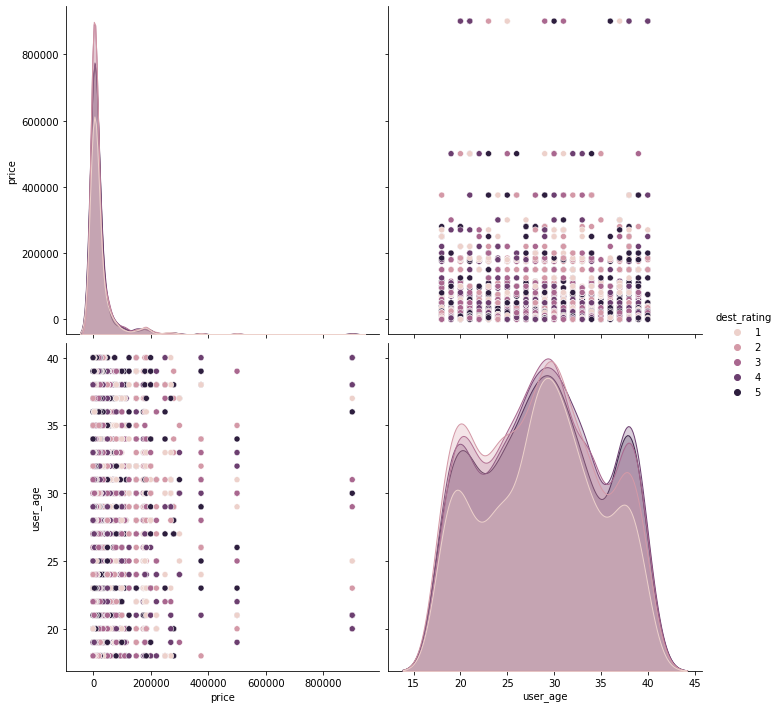

In [52]:
sns.pairplot(data,vars = ['price','user_age'], hue="dest_rating",height=5)

* Possible conclusion = User's are likely to go with lower price destinations , regardless the age

###Feature Encoding

We'll remove several columns as such :
1. rating (because it's an aggregate column)
2. user_loc_city
3. place_name

We'll not use these columns for now.

In [53]:
data.drop(columns=['user_loc_city','rating','place_name'],inplace=True)

In [54]:
data

,user_id,place_id,dest_rating,user_age,category,dest_city,price,user_loc_prov
0,1,179,3,20,Budaya,Yogyakarta,75000,Jawa Tengah
1,22,179,4,25,Budaya,Yogyakarta,75000,Jawa Barat
2,40,179,3,27,Budaya,Yogyakarta,75000,Jawa Tengah
3,49,179,5,24,Budaya,Yogyakarta,75000,DKI Jakarta
4,74,179,3,30,Budaya,Yogyakarta,75000,Jawa Tengah
...,...,...,...,...,...,...,...,...
9995,240,140,3,22,Taman Hiburan,Yogyakarta,0,Jawa Barat
9996,247,140,4,28,Taman Hiburan,Yogyakarta,0,Jawa Barat
9997,261,140,4,38,Taman Hiburan,Yogyakarta,0,DIY
9998,267,140,3,31,Taman Hiburan,Yogyakarta,0,Jawa Tengah


#### Encode

In [55]:
# HELPER

def dict_encoder(col, data=None):

  # Getting unique values
  unique_val = data[col].unique().tolist()

  # Do the encoding
  val_to_val_encoded = {x: i for i, x in enumerate(unique_val)}

  # Melakukan proses encoding angka ke value dari kolom suatu dataframe
  val_encoded_to_val = {i: x for i, x in enumerate(unique_val)}
  return val_to_val_encoded, val_encoded_to_val

####User Location

In [56]:
user_loc_prov = pd.get_dummies(data.user_loc_prov, prefix='user_prov')
data = pd.concat([data, user_loc_prov], axis=1)

In [57]:
data.head()

,user_id,place_id,dest_rating,user_age,category,dest_city,price,user_loc_prov,user_prov_Banten,user_prov_DIY,user_prov_DKI Jakarta,user_prov_Jawa Barat,user_prov_Jawa Tengah,user_prov_Jawa Timur,user_prov_Sumatera Selatan
0,1,179,3,20,Budaya,Yogyakarta,75000,Jawa Tengah,0,0,0,0,1,0,0
1,22,179,4,25,Budaya,Yogyakarta,75000,Jawa Barat,0,0,0,1,0,0,0
2,40,179,3,27,Budaya,Yogyakarta,75000,Jawa Tengah,0,0,0,0,1,0,0
3,49,179,5,24,Budaya,Yogyakarta,75000,DKI Jakarta,0,0,1,0,0,0,0
4,74,179,3,30,Budaya,Yogyakarta,75000,Jawa Tengah,0,0,0,0,1,0,0


####Category

In [58]:
dest_category = pd.get_dummies(data.category, prefix='category')
data = pd.concat([data, dest_category], axis=1)

In [59]:
data.tail()

,user_id,place_id,dest_rating,user_age,category,dest_city,price,user_loc_prov,user_prov_Banten,user_prov_DIY,...,user_prov_Jawa Barat,user_prov_Jawa Tengah,user_prov_Jawa Timur,user_prov_Sumatera Selatan,category_Bahari,category_Budaya,category_Cagar Alam,category_Pusat Perbelanjaan,category_Taman Hiburan,category_Tempat Ibadah
9995,240,140,3,22,Taman Hiburan,Yogyakarta,0,Jawa Barat,0,0,...,1,0,0,0,0,0,0,0,1,0
9996,247,140,4,28,Taman Hiburan,Yogyakarta,0,Jawa Barat,0,0,...,1,0,0,0,0,0,0,0,1,0
9997,261,140,4,38,Taman Hiburan,Yogyakarta,0,DIY,0,1,...,0,0,0,0,0,0,0,0,1,0
9998,267,140,3,31,Taman Hiburan,Yogyakarta,0,Jawa Tengah,0,0,...,0,1,0,0,0,0,0,0,1,0
9999,268,140,2,32,Taman Hiburan,Yogyakarta,0,DIY,0,1,...,0,0,0,0,0,0,0,0,1,0


####Destination City

In [60]:
dest_city = pd.get_dummies(data.dest_city, prefix='dest_city')
data = pd.concat([data, dest_city], axis=1)

In [61]:
data.tail(3)

,user_id,place_id,dest_rating,user_age,category,dest_city,price,user_loc_prov,user_prov_Banten,user_prov_DIY,...,category_Budaya,category_Cagar Alam,category_Pusat Perbelanjaan,category_Taman Hiburan,category_Tempat Ibadah,dest_city_Bandung,dest_city_Jakarta,dest_city_Semarang,dest_city_Surabaya,dest_city_Yogyakarta
9997,261,140,4,38,Taman Hiburan,Yogyakarta,0,DIY,0,1,...,0,0,0,1,0,0,0,0,0,1
9998,267,140,3,31,Taman Hiburan,Yogyakarta,0,Jawa Tengah,0,0,...,0,0,0,1,0,0,0,0,0,1
9999,268,140,2,32,Taman Hiburan,Yogyakarta,0,DIY,0,1,...,0,0,0,1,0,0,0,0,0,1


Now we drop the `user_loc`, `category` and `dest_city`

In [62]:
data.drop(['user_loc_prov','category','dest_city'],axis=1,inplace = True)
data.head()

,user_id,place_id,dest_rating,user_age,price,user_prov_Banten,user_prov_DIY,user_prov_DKI Jakarta,user_prov_Jawa Barat,user_prov_Jawa Tengah,...,category_Budaya,category_Cagar Alam,category_Pusat Perbelanjaan,category_Taman Hiburan,category_Tempat Ibadah,dest_city_Bandung,dest_city_Jakarta,dest_city_Semarang,dest_city_Surabaya,dest_city_Yogyakarta
0,1,179,3,20,75000,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,22,179,4,25,75000,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
2,40,179,3,27,75000,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
3,49,179,5,24,75000,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
4,74,179,3,30,75000,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1


####Repeat Data Info

To know the update datatype of new dataframe

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9921 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   user_id                      9921 non-null   int64
 1   place_id                     9921 non-null   int64
 2   dest_rating                  9921 non-null   int64
 3   user_age                     9921 non-null   int64
 4   price                        9921 non-null   int64
 5   user_prov_Banten             9921 non-null   uint8
 6   user_prov_DIY                9921 non-null   uint8
 7   user_prov_DKI Jakarta        9921 non-null   uint8
 8   user_prov_Jawa Barat         9921 non-null   uint8
 9   user_prov_Jawa Tengah        9921 non-null   uint8
 10  user_prov_Jawa Timur         9921 non-null   uint8
 11  user_prov_Sumatera Selatan   9921 non-null   uint8
 12  category_Bahari              9921 non-null   uint8
 13  category_Budaya              9921 non-null   uin

####Final Data

Data without the ID

In [64]:
data_clean = data.drop(columns=['user_id','place_id'],axis=1)

*There's a need for data to be kept like this in order for SVD model to be executed. We need data WITH `user_id` and `place_id` for SVD model train.*

In [65]:
data_clean.tail()

,dest_rating,user_age,price,user_prov_Banten,user_prov_DIY,user_prov_DKI Jakarta,user_prov_Jawa Barat,user_prov_Jawa Tengah,user_prov_Jawa Timur,user_prov_Sumatera Selatan,...,category_Budaya,category_Cagar Alam,category_Pusat Perbelanjaan,category_Taman Hiburan,category_Tempat Ibadah,dest_city_Bandung,dest_city_Jakarta,dest_city_Semarang,dest_city_Surabaya,dest_city_Yogyakarta
9995,3,22,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9996,4,28,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9997,4,38,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
9998,3,31,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
9999,2,32,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [66]:
data_clean.shape

(9921, 21)

### Splitting Data

Let's split the data first between test and train. But first, let's do some encode on categorical/non-numerical features.

In [67]:
# split train test
from sklearn.model_selection import train_test_split

feature = data_clean.drop(columns='dest_rating')
target = data_clean[['dest_rating']]

feature_admit_train, feature_admit_test, target_admit_train, target_admit_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [68]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_admit_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1715: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,feature,vif_score
1,user_age,1.005190
2,price,1.056198
3,user_prov_Banten,inf
4,user_prov_DIY,inf
5,user_prov_DKI Jakarta,inf
6,user_prov_Jawa Barat,inf
7,user_prov_Jawa Tengah,inf
8,user_prov_Jawa Timur,inf
9,user_prov_Sumatera Selatan,inf
10,category_Bahari,inf


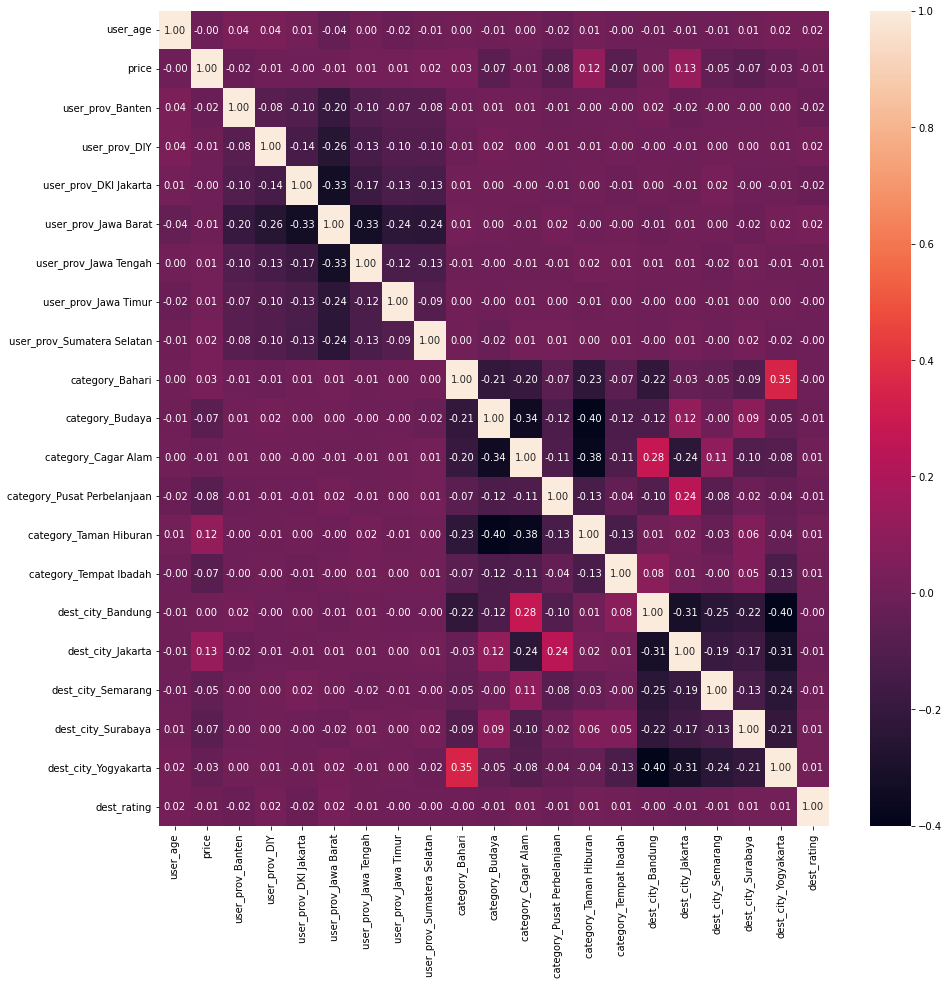

In [69]:
# heatmap correlation
admit_train = pd.concat([feature_admit_train, target_admit_train], axis=1)
corr = admit_train.corr()

plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

No high multicorrelation against each features. Let's continue to build a ML recommendation model.

###Model

Here, I am using Collaborative Filtering with 3 models in regression, RandomForestRegressor, SVD and KNNBasic.

Should we use `HyperParameters Tuning` ?
In this case, I don't think so, because we only use small parameters thus there's no need to use such highly Hyperparameter Tuning's technique. But it still depends, if we think we need to enhance the model, we may use HyperParameters Tuning

####Training

#####Random Forest Regressor with Hyperparameter Tuning

In [70]:
%%time
def trainRFRModel(x_train=None, y_train=None, scoring_type=None):
  # define random forest classifier model
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.model_selection import GridSearchCV

  rf_rgs = RandomForestRegressor(random_state=42)

  parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
  }

  # note: we use regression
  rf_rgs_gridcv = GridSearchCV(rf_rgs, parameters, cv=5, n_jobs=-1, scoring=scoring_type)
  rf_rgs_gridcv.fit(x_train, y_train)

  # the results
  cv_result = pd.DataFrame(rf_rgs_gridcv.cv_results_)
  retain_cols = ['params','mean_test_score','rank_test_score']
  cv_result[retain_cols].sort_values('rank_test_score')

  return rf_rgs_gridcv

CPU times: user 8 µs, sys: 0 ns, total: 8 µs
Wall time: 13.1 µs


If we break to parts :

In [71]:
## define random forest classifier model
#from sklearn.ensemble import RandomForestRegressor

#rf_rgs = RandomForestRegressor(random_state=42)

In [72]:
#%%time
#from sklearn.model_selection import GridSearchCV
#
#parameters = {
#    'n_estimators': (10,20,30,40,50),
#    'max_depth':(1,2,3,4,5)
#}
#
## note: we use regression
#rf_rgs_gridcv = GridSearchCV(estimator, parameters, cv=5, n_jobs=-1, scoring=scoring_type)
#rf_rgs_gridcv.fit(feature_admit_train, target_admit_train)

In [73]:
## the results
#cv_result = pd.DataFrame(model_results.cv_results_)
#retain_cols = ['params','mean_test_score','rank_test_score']
#cv_result[retain_cols].sort_values('rank_test_score')

Notes on GridSearchCV :

rf_rgs_gridcv = GridSearchCV(estimator=rf_rgs, param_grid=parameters, cv=5, n_jobs=-1, scoring='r2')

* estimator : In this we have to pass the metric or the model for which we need to optimize the parameters.
* param_grid : In this we have to pass the dictionary of parameters that we need to optimize.
* cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
* n_iter : This signifies the number of parameter settings that are sampled. By default it is set as 10.
* n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.
* scoring : Strategy to evaluate the performance of the cross-validated model on the test set (we are using RandomForestRegressor, thus use Regression scoring such as R2, MAPE and such)

More : [GridSearchCV by Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)

#####Random Forest Regressor without Hyperparameter Tuning

In [74]:
%%time
def trainRFRModelNoHyperParameter(x_train=None, y_train=None, scoring_type=None):
  # Fitting Random Forest Regression to the dataset
  # import the regressor
  from sklearn.ensemble import RandomForestRegressor

  # create regressor object
  rf_rgr_wo_hp = RandomForestRegressor(random_state = 42)

  # fit the regressor with x and y data
  rf_rgr_wo_hp.fit(x_train, y_train)

  return rf_rgr_wo_hp

CPU times: user 7 µs, sys: 1 µs, total: 8 µs
Wall time: 14.3 µs


In [75]:
def getConclusionRFR(data=None, feature_admit_test=None, target_admit_test=None, hp_tune=0):
  # regression report
  from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

  y_pred = data.predict(feature_admit_test)

  if hp_tune == 1:
    y_pred = data.best_estimator_.predict(feature_admit_test)

  print('R2 Score : ',r2_score(target_admit_test, y_pred))
  print('MAE : ',mean_absolute_error(target_admit_test, y_pred))
  print('MAPE : ',mean_absolute_percentage_error(target_admit_test, y_pred))
  print('RMSE : ',mean_squared_error(target_admit_test, y_pred))

#####SVD
In SVD step , we are going to use latest cleaned data, not the trained data one because we need `user_id`, `place_id` and `ratings` given by the users.

More : [Surprise Library - Python Recommendation System](https://surpriselib.com/)

In [84]:
def trainSVDModel(data_in=None, cv=None, measures=None, data_column=None):
  # import SVD library
  import surprise
  from surprise import SVD
  from surprise import accuracy
  from surprise.model_selection import train_test_split, cross_validate
  from surprise import Reader, Dataset
  from surprise import KNNBasic

  proc_data = data_in[list(data_column.split(','))]
  reader = Reader()
  data = Dataset.load_from_df(proc_data, reader)

  # Train & Test
  trainset, testset = train_test_split(data, test_size=0.20, random_state=42)

  algo_svd = SVD()
  prediction_mf = algo_svd.fit(trainset).test(testset)

  measure = list(measures.split(","))
  perf = cross_validate(algo_svd, data, measures=measure, cv=cv, verbose=True)

  # Prediction
  print(prediction_mf)

  # Performance
  print(perf)

  # [user x latentfactors] 
  print(algo_svd.pu)

  # [latentfactors x Items]
  print(algo_svd.qi)

#####KNNBasic

In [77]:
def trainKNNBaseModel(data_in=None, cv=None, measures=None, data_column=None):
  # import SVD library
  import surprise
  from surprise import accuracy
  from surprise.model_selection import train_test_split, cross_validate
  from surprise import Reader, Dataset
  from surprise import KNNBasic

  proc_data = data_in[list(data_column.split(','))]
  reader = Reader()
  data = Dataset.load_from_df(proc_data, reader)

  # Train & Test
  trainset, testset = train_test_split(data, test_size=0.20, random_state=42)
  similar_opt = {'name': 'pearson_baseline','shrinkage': 0}

  algo_knn = KNNBasic(k=50, sim_options=similar_opt)
  prediction_knn = algo_knn.fit(trainset).test(testset)

  measure = list(measures.split(","))
  perf = cross_validate(algo_knn, data, measures=measure, cv=cv, verbose=True)

  # Prediction
  print(prediction_knn)

  # Performance
  print(perf)

####Results

#####Random Forest Regressor with HyperParameters Tuning

In [78]:
rf_rgs_gridcv_end = trainRFRModel(x_train=feature_admit_train,
                                  y_train=target_admit_train, 
                                  scoring_type='r2')

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [79]:
getConclusionRFR(data=rf_rgs_gridcv_end, 
                 feature_admit_test=feature_admit_test,
                 target_admit_test=target_admit_test,
                 hp_tune=1)

R2 Score :  0.0019648766256861183
MAE :  1.172356302338332
MAPE :  0.5903734336320904
RMSE :  1.9013215949685551


#####Random Forest Regressor without HyperParameters Tuning

In [80]:
rf_rgs_no_hp_tune = trainRFRModelNoHyperParameter(x_train=feature_admit_train,
                                  y_train=target_admit_train, 
                                  scoring_type='r2'
                                  )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [81]:
getConclusionRFR(data=rf_rgs_no_hp_tune, 
                 feature_admit_test=feature_admit_test,
                 target_admit_test=target_admit_test
                 )

R2 Score :  -0.2382794984615102
MAE :  1.2989675263394547
MAPE :  0.6297988978697937
RMSE :  2.359002700297446


#####SVD

According to *Surprise* package, only 3 parameters that needed to be passed (uid, iid, rating). Hence, we'll use `user_id`, `place_id` and `dest_rating`.

In [85]:
trainSVDModel(data_in=data, cv=5, measures='RMSE,MAE', data_column='user_id,place_id,dest_rating')

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.4158  1.4290  1.4048  1.4272  1.4260  1.4206  0.0091  
MAE (testset)     1.2168  1.2304  1.2049  1.2273  1.2213  1.2201  0.0089  
Fit time          0.48    0.49    0.50    0.51    0.51    0.50    0.01    
Test time         0.02    0.01    0.02    0.02    0.01    0.02    0.00    
[Prediction(uid=234, iid=284, r_ui=4.0, est=2.8627307503997366, details={'was_impossible': False}), Prediction(uid=176, iid=132, r_ui=5.0, est=3.4556209208212034, details={'was_impossible': False}), Prediction(uid=131, iid=407, r_ui=5.0, est=2.9220765435248475, details={'was_impossible': False}), Prediction(uid=80, iid=272, r_ui=1.0, est=2.316940824479391, details={'was_impossible': False}), Prediction(uid=265, iid=396, r_ui=5.0, est=2.9649974115790365, details={'was_impossible': False}), Prediction(uid=277, iid=345, r_ui=4.0, est=3.0066230942438907, details={'was_

#####KNNBasic

KNNBasic is following SVD model train format

In [83]:
trainKNNBaseModel(data_in=data, cv=5, measures='RMSE,MAE', data_column='user_id,place_id,dest_rating')

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.6445  1.6231  1.6422  1.6362  1.6348  1.6362  0.0075  
MAE (testset)     1.3669  1.3477  1.3596  1.3648  1.3584  1.3595  0.0067  
Fit time      

####Model Conclusion

1. According to MAE and MAPE description, we can conclude that our RandomForestRegressor model with HyperParameter Tuning has about 1.1723 deviation error (MAE) or equal to 59.0373% deviation (MAPE) relative to true `dest_rating`. But, it's known that the closer MAE to 0, the better it is. This model also has 0.19648 R2 score and 1.9013 for RMSE. We can conclude that this model isn't suitable for recommendation technique because R2, MAE and RMSE is not. Meanwhile, RandomForestRegressor shown that it has minus R2, which means, the model isn't suitable for the case or it is overfitted, thus we use HyperParameter Tuned version. Even so, the model isn't quitely correct-fitted.
2. SVD doesn't have MAPE algorithm yet, but it has RMSE and MAE. According to RMSE and MAE description, we can conclude that SVD has better performance compared to RandomForestRegressor even though it's still questionable because of the numbers appeared.
3. KNNBasic also has similar representation against SVD with slight differences in RMSE and MAE. But still, SVD model has a better performance of the 3 models.

###Conclusion
1. Which category the best place to visit for ?
  * The highest category was won by "Taman Hiburan", followed by "Budaya" and "Cagar Alam"
2. Which province is the most visited ?
  * Yogyakarta is the most visited province, followed by Bandung and Jakarta
3. What is the best model to represent recommendation engine for tourism within this scope ?
  * As for now, recommendation system with SVD model, using *Surprise* library, is the best model to be implemented.
4. What can we do to boost the tourism ?
  * We can see that "Taman Hiburan", "Budaya" and "Cagar Alam" places are the most visited category among users. Upon analyzing, fee, age and region doesn't seem affect the ratings which given by users that much. Maybe, by boosting, rehabilitating, and promoting these 3 categories of places, we can boosts more people to enjoy vacation in Indonesia.